## Linear models

Let's practice some of the key steps of a linear model fitting analysis using dataset 2. This includes:
- loading the data
- inspecting it with a scatter plot
- cleaning it
- testing for correlation
- fitting the model

In [9]:
library(tidyverse, quietly = TRUE)
library(testthat, quietly = TRUE)

Firstly, we will load our trusty dataset 2 and remove missing values.

In [11]:
ds2 <- read.csv("./data/DATA_SET_REFERENCE_2.csv", row.names = 1)
ds2 <- ds2[complete.cases(ds2),]

Now we can make a scatter plot of the variable `LDL` against `Hours_sun` to get a visual impression of dependency. Are there evidence of outliers?

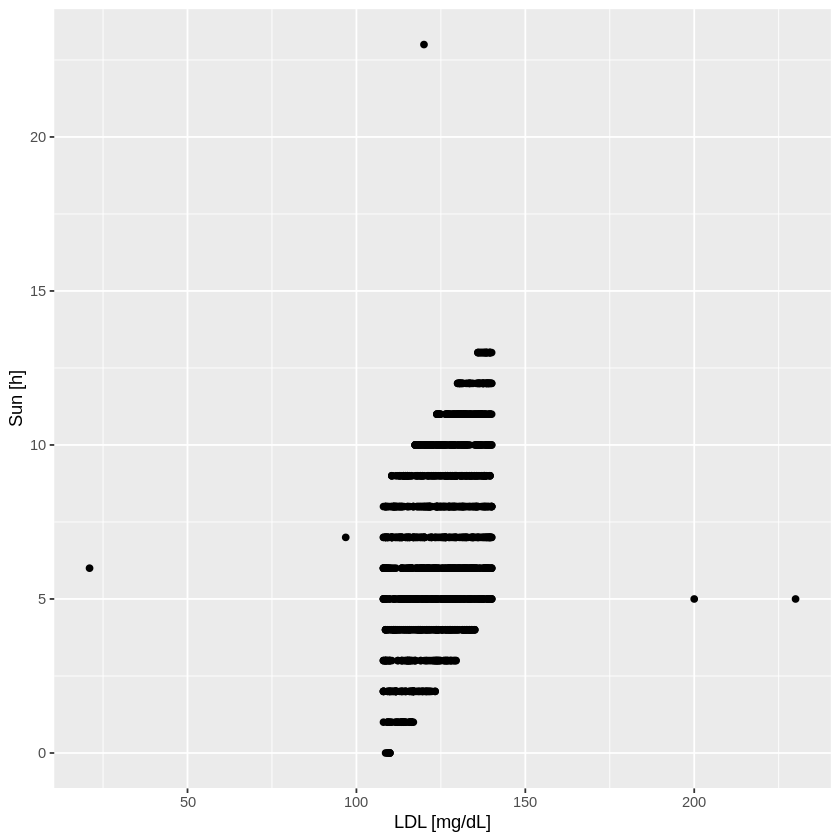

In [12]:
ggplot(ds2, aes(x = LDL, y = Hours_sun)) + 
    geom_point() +
    xlab("LDL [mg/dL]") +
    ylab("Sun [h]")

It looks like there are some outliers in our dataset! We need to create an index for outliers in `LDL` as well as `Hours_sun`.

In [13]:
# Create a logical index selecting only rows where the value of LDL or Hours_sun 
# is further than 3 standard deviations away from respective mean.

# idx <- 

# your code here
idx <- (abs(ds2$LDL - mean(ds2$LDL)) > 3 * sd(ds2$LDL)) |
       (abs(ds2$Hours_sun - mean(ds2$Hours_sun)) > 3 * sd(ds2$Hours_sun))


table(idx)

idx
FALSE  TRUE 
 1253     4 

In [14]:
test_that("Are you sure your index is set to 'TRUE' for every outlier in LDL?", {
    expect_false(any(abs(ds2$LDL[!idx] - mean(ds2$LDL)) > 3*sd(ds2$LDL)) )
})

test_that("Are you sure your index  is set to 'TRUE' for every outlier in Hours_sun?", {
    expect_false(any(abs(ds2$Hours_sun[!idx] - mean(ds2$Hours_sun)) > 3*sd(ds2$Hours_sun)) )
})

test_that("Are you sure your index is set to 'TRUE' for every outlier in Hours_sun or LDL?", {
    expect_true(table(idx)['TRUE'] == 4)
})



Test passed 🥳
Test passed 🥇
Test passed 😸


Now we can test for linear correlation between our two variables, excluding the outliers.

In [15]:
# Now calculate linear correlation in a two-sided test, excluding the outliers we have just 
# selected with our index, and store the p-value in the variable.

# Hours_sun.LDL.cor.pval <- 

# your code here
ds2_filtered <- ds2[!idx, ]
Hours_sun.LDL.cor.test <- cor.test(ds2_filtered$Hours_sun, ds2_filtered$LDL, alternative = "two.sided")
Hours_sun.LDL.cor.pval <- Hours_sun.LDL.cor.test$p.value


print(class(Hours_sun.LDL.cor.pval))
print(Hours_sun.LDL.cor.pval)

[1] "numeric"
[1] 3.401166e-74


In [16]:
test_that("Make sure to store the p-value in variable Hours_sun.LDL.cor.pval!", {
    expect_equal(class(Hours_sun.LDL.cor.pval), 'numeric')
})


Test passed 😀


Good news, we have reached the point where we can fit the linear model to the data!

In [17]:
# Fit a linear model to the filtered columns LDL and Hours_sun, again excluding the defined outliers 
# using the index we have just created. Specify Hours_sun as the response variable and LDL as the predictor
# in the model formula.

# hs.vs.ldl.lm <- 

# your code here
ds2_filtered <- ds2[!idx, ]
hs.vs.ldl.lm <- lm(Hours_sun ~ LDL, data = ds2_filtered)


# print the R-square value
print(summary(hs.vs.ldl.lm)$r.squared)

[1] 0.2332148


In [18]:
test_that("Are you sure you have used the index to exclude the outliers from the dataset?", {
    expect_equal(length(hs.vs.ldl.lm$effects), 1253)
})


Test passed 😀


We can visualize the fit by adding the line to the scatter plot from above.

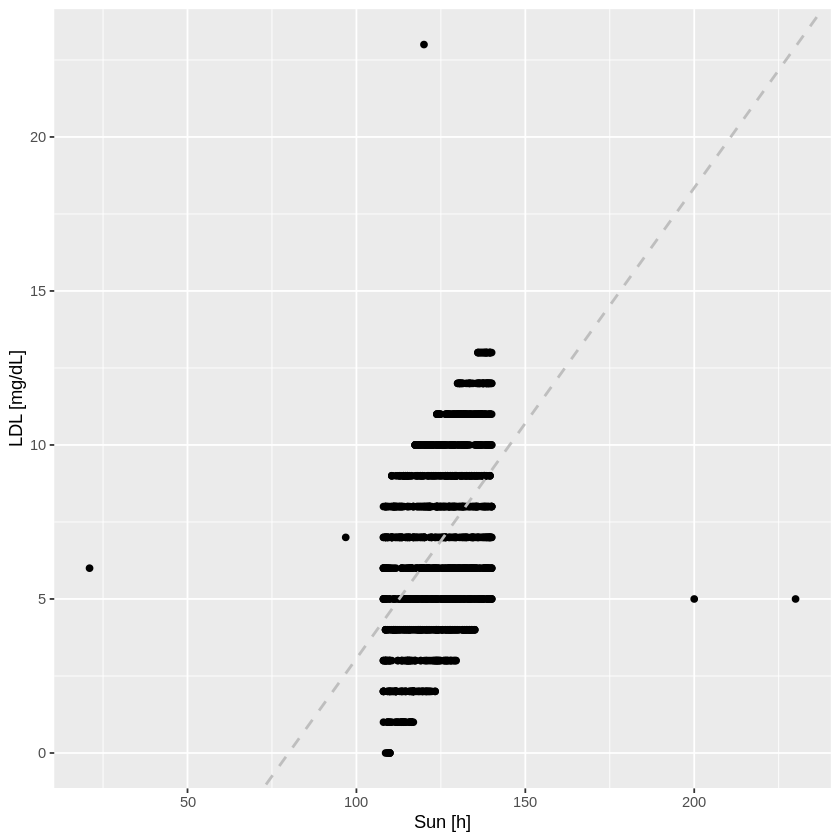

In [19]:
coeff = coefficients(hs.vs.ldl.lm)

ggplot(ds2, aes(x = LDL, y = Hours_sun)) + 
    geom_point() +
    ylab("LDL [mg/dL]") +
    xlab("Sun [h]") +
    geom_abline(intercept = coeff[1], 
                slope = coeff[2], 
                color = 'gray', 
               size = .8,
               linetype = "dashed")

Now we can check how well the model fits by looking at the mean residuals.

In [20]:
# Calulate the mean of the residuals stored in the linear model object hs.vs.ldl.lm

# mu.residuals <- 

# your code here
mu.residuals <- mean(residuals(hs.vs.ldl.lm))


print(mu.residuals)

[1] -8.323904e-17


In [21]:
test_that("Are you sure you have used the index to exclude the outliers from the dataset?", {
    expect_equal(length(hs.vs.ldl.lm$effects), 1253)
})


Test passed 😸
